<a href="https://kritikseth.github.io/redirect" target="_parent"><img src="https://raw.githack.com/kritikseth/kritikseth/master/redirect.svg" alt="Kritik Seth"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from category_encoders import TargetEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Capstone/transformed_fps.csv')

In [ ]:
drop_cols = ['id', 'CPU Name', 'GPU Name','GPU Open GL','CPU Model','Dataset']
label_cols = ['CPU Brand', 'CPU Series',
              'CPU Type', 'CPU Multiplier Unlocked',
              'GPU Architecture', 'GPU Bus', 'GPU Memory Type',
              'GPU Open CL','GPU Shader Model', 'GPU Vulkan', 'Game', 'GPU Direct X', 'Game Settings']

auto_ordinal_cols = ['Game Resolution', 'CPU Base Clock'] 
df = df.drop(drop_cols, axis=1)

### Mean Encoding

In [ ]:
for label in label_cols:
  mean = df['FPS'].mean()
  agg = df.groupby(label)['FPS'].agg(['count', 'mean'])
  counts = agg['count']
  means = agg['mean']
  weight = 100
  smooth = (counts*means+weight*mean)/(counts+weight)
  df.loc[:,label] = df[label].map(smooth)

In [ ]:
df.shape

(390711, 43)

### Random forest

In [ ]:
rfr = RandomForestRegressor(n_estimators=200, criterion='mse', 
                            max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            bootstrap=True, oob_score=False, n_jobs=-1, 
                            random_state=2998, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
df1 = df.drop(['FPS'],axis=1)                           
X = df1
y = df['FPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=43)
rfr.fit(X_train, y_train) 
prediction = rfr.predict(X_test)
mse = mean_squared_error(y_test, prediction)

print(f'MSE is {mse}')
print(f'RMSE is {mse**0.5}')
print(f'R2 score is {r2_score(y_test, prediction)}')

MSE is 2611.9087999093085
RMSE is 51.10683711509947
R2 score is 0.6511031838735473


### Scatter plot

In [ ]:
# plt.scatter(prediction, prediction - y_test, c='green', marker='s', label='Test data')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='upper left')
# plt.hlines(y=0, xmin=0, xmax=1000, lw=2, color='red')
# plt.xlim([0, 1000])
# plt.tight_layout()
# plt.show()

### Feature importances

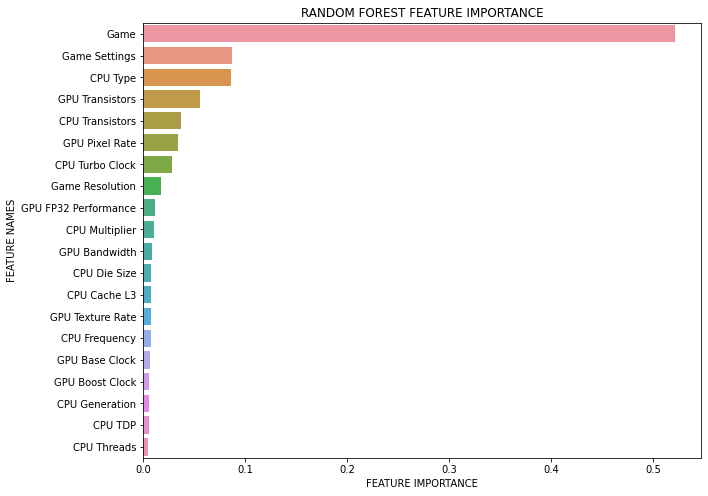

In [ ]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'][:20])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(rfr.feature_importances_,X_train.columns,'RANDOM FOREST')

In [ ]:
df = df.sort_values('Game Settings')
df['Game Settings'].value_counts()

139.613263    204292
185.571767     76233
122.355538     64573
129.071181     45613
Name: Game Settings, dtype: int64

In [ ]:
df_low = df[:64573]
df_med = df[64573:110186]
df_high = df[110186:314478]
df_max = df[314478:]

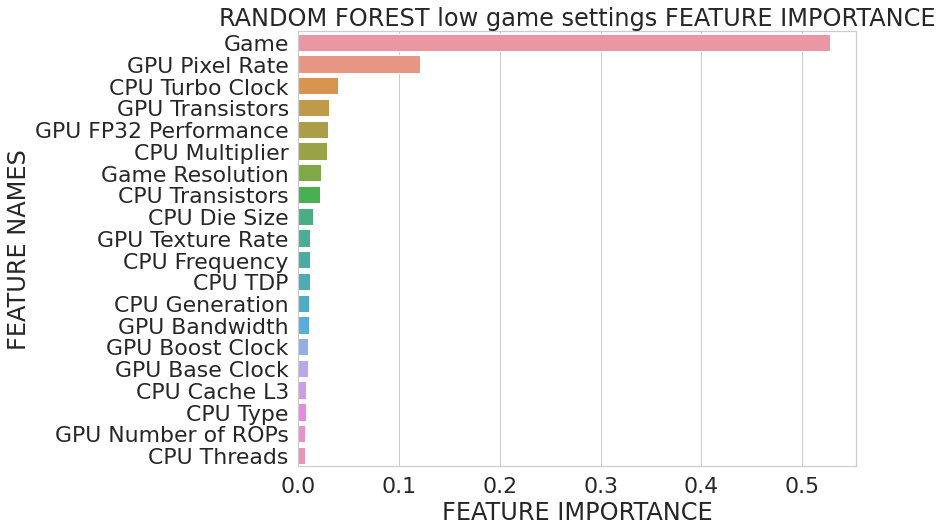

In [ ]:
rfr = RandomForestRegressor(n_estimators=200, criterion='mse', 
                            max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            bootstrap=True, oob_score=False, n_jobs=-1, 
                            random_state=2998, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

df1=df_low.drop(['FPS'],axis=1)                           
X = df1
y = df_low['FPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
rfr.fit(X_train, y_train) 
plot_feature_importance(rfr.feature_importances_,X_train.columns,'RANDOM FOREST low game settings')

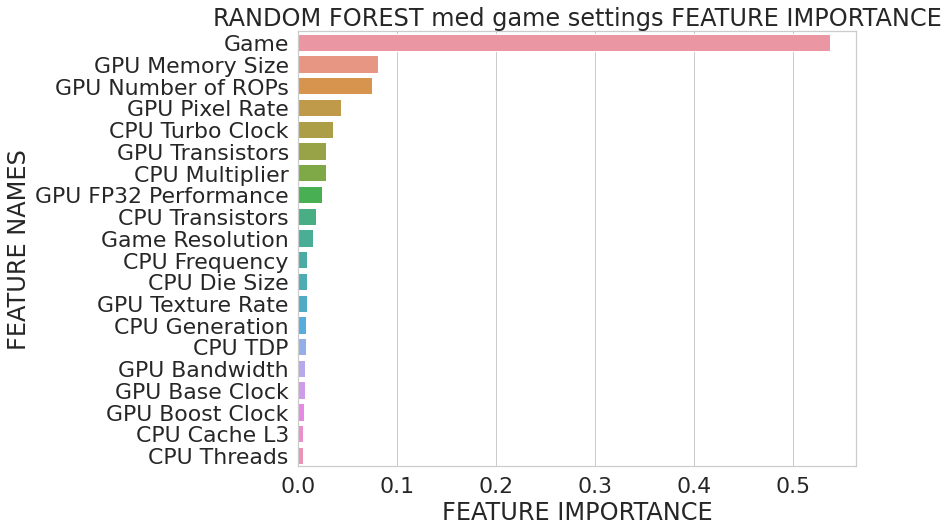

In [ ]:
df1 = df_med.drop(['FPS'],axis=1)                           
X = df1
y = df_med['FPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
rfr.fit(X_train, y_train) 
plot_feature_importance(rfr.feature_importances_,X_train.columns,'RANDOM FOREST med game settings')

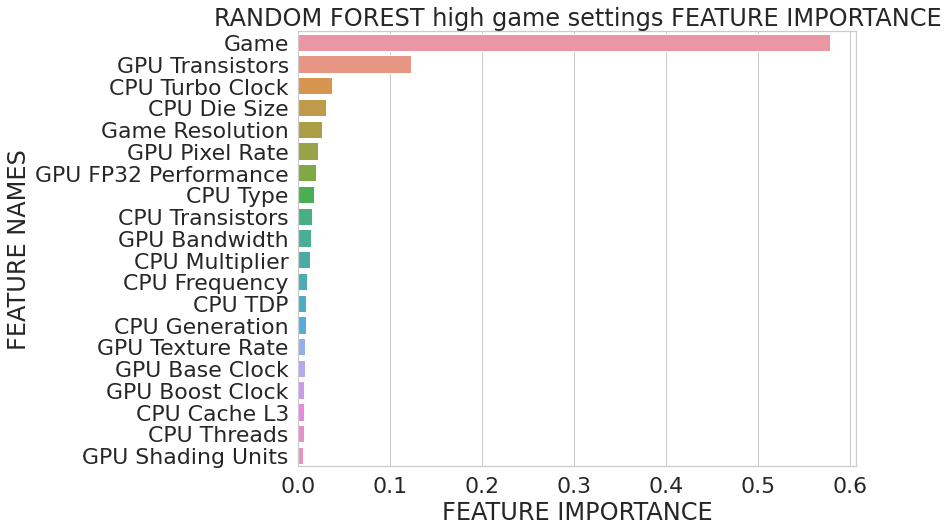

In [ ]:
df1 = df_high.drop(['FPS'],axis=1)                           
X = df1
y = df_high['FPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
rfr.fit(X_train, y_train) 
plot_feature_importance(rfr.feature_importances_,X_train.columns,'RANDOM FOREST high game settings')

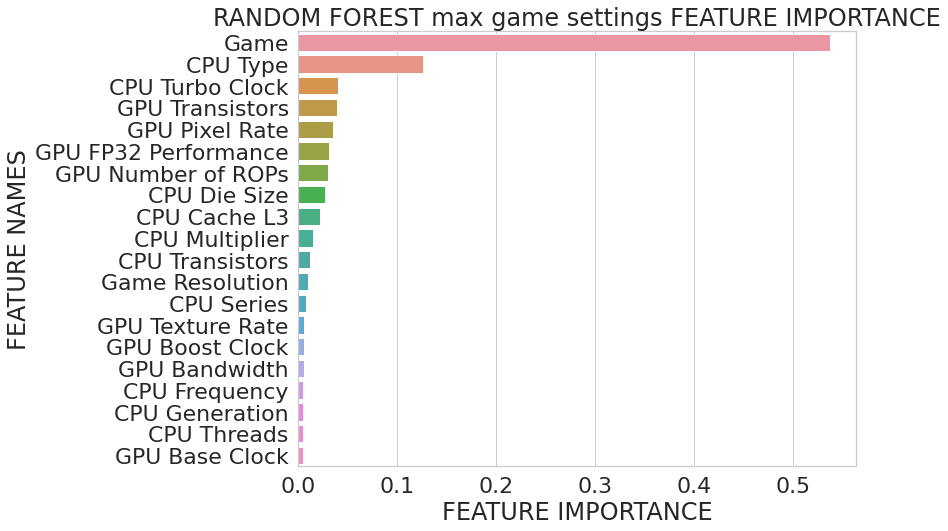

In [ ]:
df1 = df_max.drop(['FPS'],axis=1)                           
X = df1
y = df_max['FPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
rfr.fit(X_train, y_train) 
plot_feature_importance(rfr.feature_importances_,X_train.columns,'RANDOM FOREST max game settings')

### PCA

In [ ]:
df_= df.drop(['FPS'],axis=1)                           
X_train, X_test, y_train, y_test = train_test_split(df_, df['FPS'], test_size = 0.30, random_state=23)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

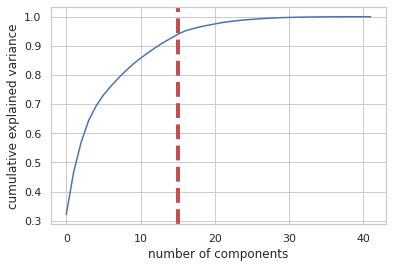

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.321451,0.321451
1,0.468007,0.146556
2,0.569253,0.101246
3,0.643133,0.073880
4,0.693012,0.049879
5,0.731164,0.038152
6,0.761285,0.030121
7,0.788819,0.027534
8,0.814151,0.025332
9,0.837311,0.023160


In [ ]:
pca_test = PCA(n_components=42)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=15, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [ ]:
pca = PCA(n_components=15)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [ ]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=df_.columns, index=pca_dims)
pca_test_df.head(15).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9,PCA Component 10,PCA Component 11,PCA Component 12,PCA Component 13,PCA Component 14
CPU Brand,0.035516,-0.349749,0.120584,-0.045946,-0.017971,-0.015883,0.164129,-0.003448,0.128800,0.029048,-0.118188,0.060738,0.095522,-0.011750,-0.108653
CPU Series,0.101713,-0.274880,-0.072062,0.211175,0.127681,-0.026605,0.027279,-0.017855,0.081398,0.000917,-0.161120,0.083199,0.179994,-0.038647,-0.111240
CPU Generation,0.063004,-0.119273,0.132705,-0.289361,-0.068291,0.051123,0.470538,0.058135,0.394325,0.039464,0.031222,-0.017459,-0.018037,0.004212,-0.038557
CPU Type,0.151753,-0.121764,0.164649,-0.104057,0.324406,0.131275,-0.008936,0.015369,-0.084502,-0.093679,-0.171904,0.101221,0.325866,-0.001610,0.020836
CPU Cores,0.070160,0.341728,-0.059503,-0.027407,0.111177,-0.076864,0.172914,0.000858,0.245906,0.044321,-0.087931,0.044710,0.080858,-0.002613,-0.087599
CPU Threads,0.121809,0.246192,-0.106325,0.136819,0.237977,-0.008829,-0.057971,-0.033517,0.048363,0.172901,0.034266,-0.023833,-0.165105,-0.008551,-0.119668
CPU Base Clock,-0.096760,0.235250,0.170741,-0.318370,-0.138710,0.010274,0.059540,0.013869,0.030798,0.004305,0.089809,-0.052227,-0.119598,0.032935,0.030905
CPU Cache L1,0.076106,0.302362,-0.192730,0.177431,0.164964,-0.052277,-0.011225,-0.008112,0.068712,0.027390,-0.029554,0.015433,0.037990,-0.010232,-0.019320
CPU Cache L2,-0.040732,0.368381,0.032848,-0.163631,-0.023300,-0.012310,0.024511,0.004829,0.057781,0.011654,0.075746,-0.045646,-0.107200,0.031520,0.009991
CPU Cache L3,0.090916,0.239007,-0.154401,0.167409,0.233551,-0.024427,-0.001783,-0.021906,0.023182,0.096618,0.077014,-0.058166,-0.174562,-0.003044,-0.048726


In [ ]:
rfr.fit(X_train_scaled_pca, y_train)
prediction = rfr.predict(X_test_scaled_pca)

mse = mean_squared_error(y_test, prediction)
print(f'MSE is {mse}')
print(f'RMSE is {mse**0.5}')
print(f'R2 score is {r2_score(y_test, prediction)}')

MSE is 2587.6266178951128
RMSE is 50.86871944422341
R2 score is 0.6531729449715254


In [ ]:
X_pca_big, X_pca_small, y_big, y_small = train_test_split(X_train_scaled_pca, y_train, test_size = 0.5, random_state=538)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfr, 
                        param_dist, 
                        n_iter = 10, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=42)
rs.fit(X_pca_small, y_small)
rs.best_params_
# {'n_estimators': 300,
# 'min_samples_split': 12,
# 'min_samples_leaf': 23,
# 'max_features': 'log2',
# 'max_depth': 14,
# 'bootstrap': False}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 300,
 'min_samples_split': 12,
 'min_samples_leaf': 23,
 'max_features': 'log2',
 'max_depth': 14,
 'bootstrap': False}

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,300,12,23,log2,14,False,0.650572,1
1,400,23,18,log2,13,False,0.649413,2
2,700,44,44,log2,13,False,0.643297,3
3,100,28,44,log2,9,True,0.612252,4
4,300,18,39,log2,8,False,0.598538,5
5,600,50,39,sqrt,8,True,0.597543,6
6,500,44,12,sqrt,6,True,0.546286,7
7,900,28,7,log2,5,False,0.501987,8
8,600,34,12,log2,4,True,0.450124,9
9,100,34,44,log2,1,True,0.167413,10


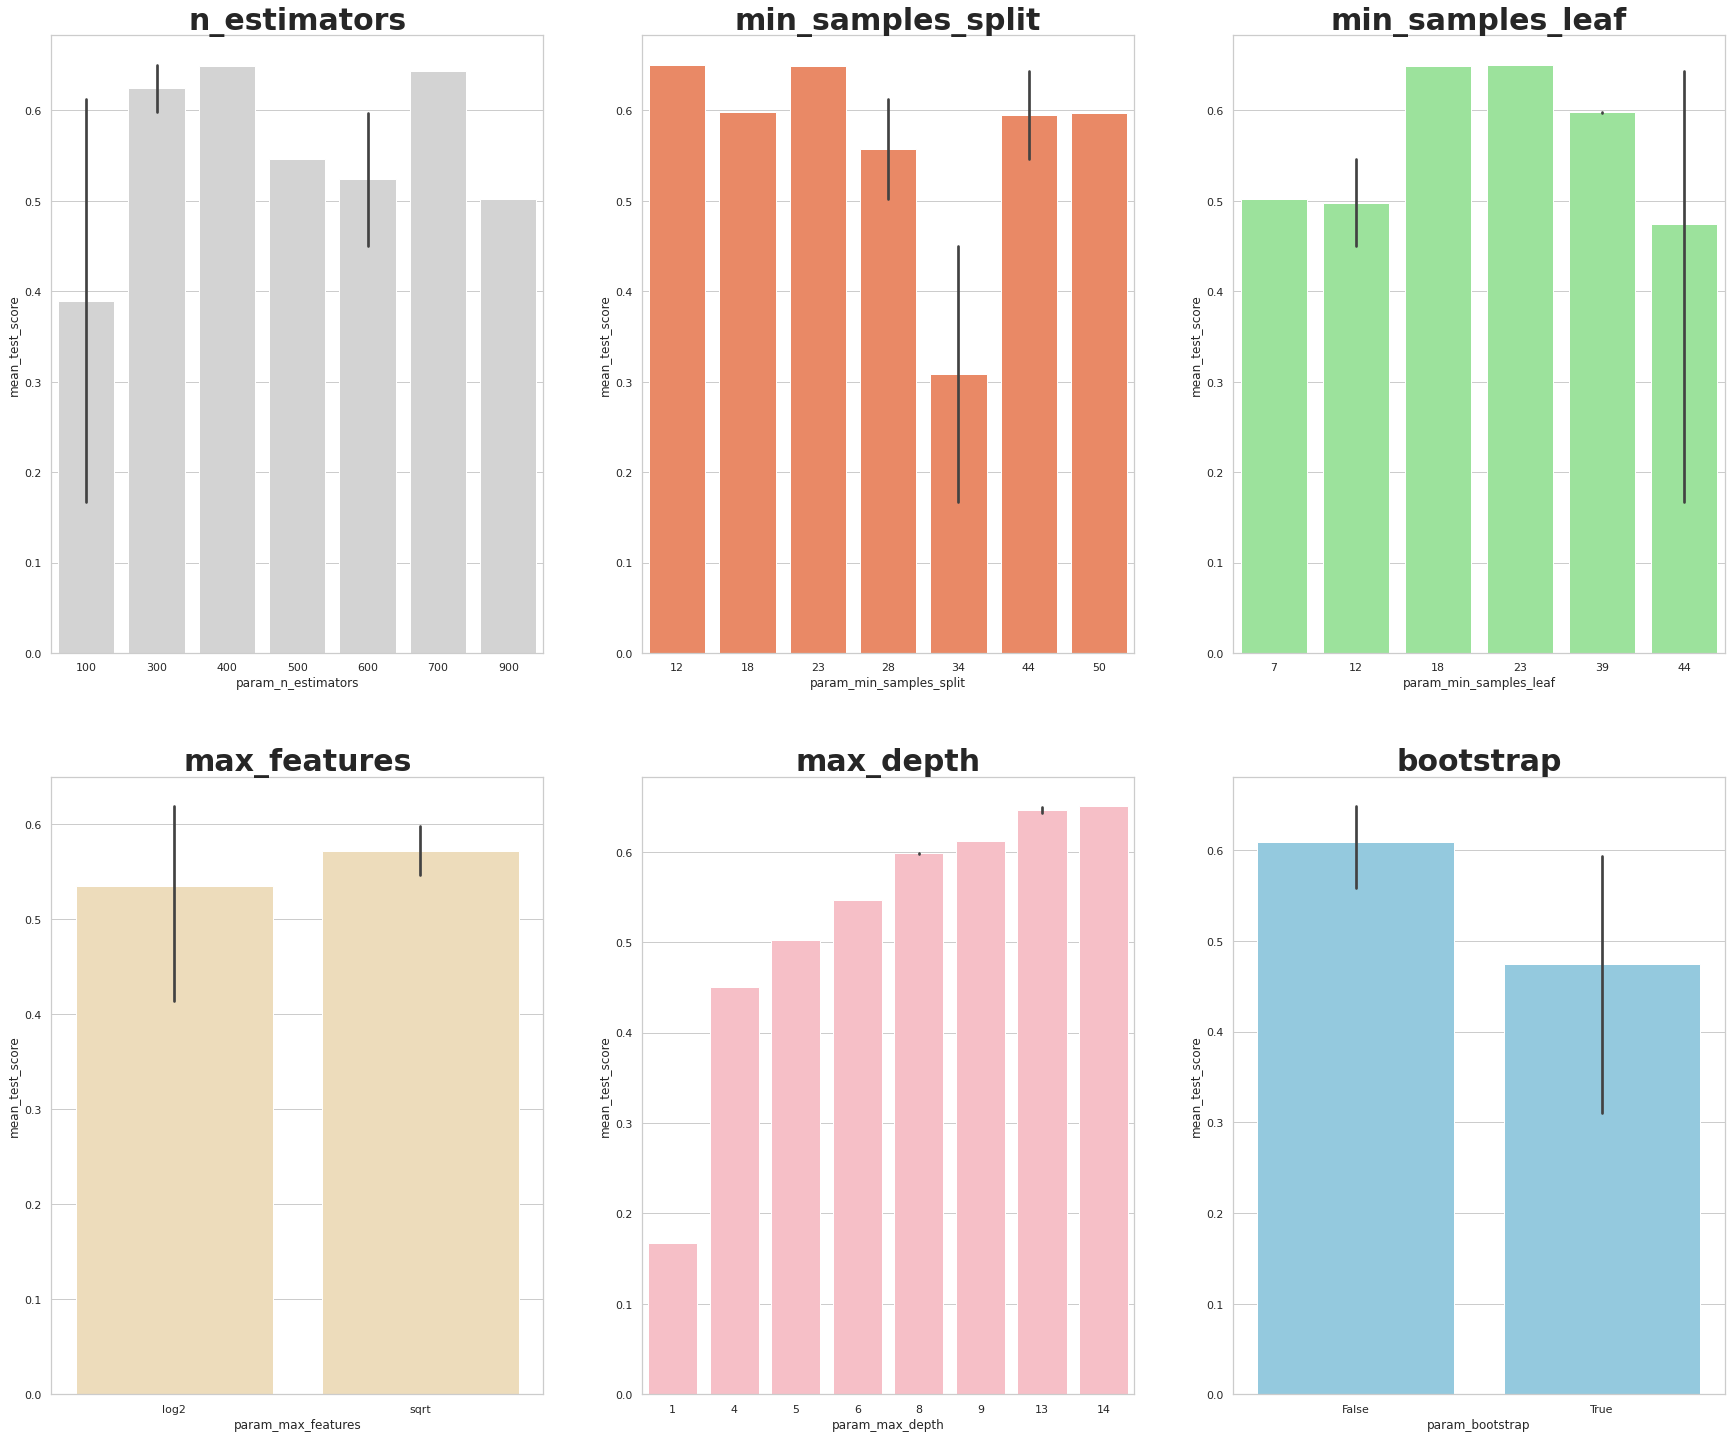

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
# axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
# axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
# axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
# axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
# axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
# axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [ ]:
rfr = RandomForestRegressor(n_estimators=200, criterion='mse', 
                            max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            bootstrap=True, oob_score=False, n_jobs=-1, 
                            random_state=2998, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rfr.fit(X_train_scaled_pca, y_train)
# y_pred = rfr.predict(X_test_scaled_pca)
# y_pred_pca = rfr.predict(X_test_scaled_pca)
y_pred_gs = rs.best_estimator_.predict(X_test_scaled_pca)

In [ ]:
mse = mean_squared_error(y_test, y_pred_gs)
print(f'MSE is {mse}')
print(f'RMSE is {mse**0.5}')
print(f'R2 score is {r2_score(y_test, y_pred_gs)}')

MSE is 2544.3824934842282
RMSE is 50.44187242246493
R2 score is 0.6589690796275031


### ANN

In [ ]:
X = df
y = df['FPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=18714836) #20 epochs and 32 batch_size gives the best results

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
history = NN_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_absolute_error')

In [ ]:
predictions = NN_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

In [ ]:
print(mae)
print(mse**0.5)

In [ ]:
r2_score(y_test, predictions)

<a href="https://kritikseth.github.io/redirect" target="_parent"><img src="https://raw.githack.com/kritikseth/kritikseth/master/redirect.svg" alt="Kritik Seth"/></a>